In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data_path = "/content/drive/MyDrive/Capstone/Sarcasm_Headlines_Dataset_v2.json"

# Read the JSON file line by line and create a DataFrame
data = []
with open(data_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)

# Initial Data Exploration

In [3]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
# checking for missing values
df.isnull().sum()

,0
is_sarcastic,0
headline,0
article_link,0


# Data Cleaning

In [5]:
df.describe(include='all')

,is_sarcastic,headline,article_link
count,28619.000000,28619,28619
unique,NaN,28503,28617
top,NaN,"'no way to prevent this,' says only nation whe...",https://politics.theonion.com/nation-not-sure-...
freq,NaN,12,2
mean,0.476397,NaN,NaN
std,0.499451,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [6]:
# Drop Unnecessary Columns (article link)
df = df.drop(columns=['article_link'])

In [7]:
# Checking for duplicates
print(f"Number of duplicate headlines: {df.duplicated(subset='headline').sum()}")

# Drop duplicate headlines
df = df.drop_duplicates(subset='headline').reset_index(drop=True)

Number of duplicate headlines: 116


# Class Distribution

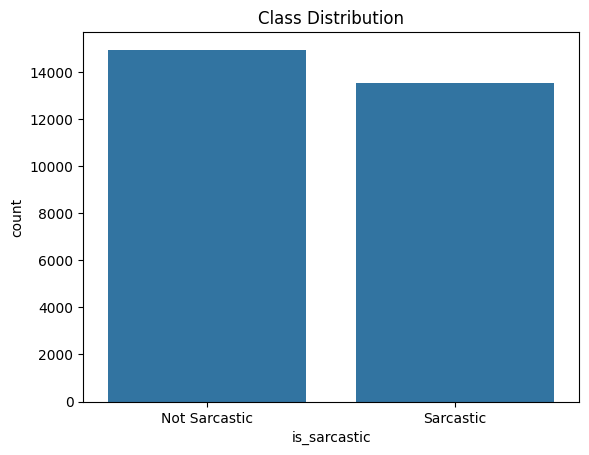

In [8]:
sns.countplot(x='is_sarcastic', data=df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Not Sarcastic', 'Sarcastic'])
plt.show()

In [9]:
# Display Class Counts and Percentages
class_counts = df['is_sarcastic'].value_counts()
class_percentages = df['is_sarcastic'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

Class Counts:
 is_sarcastic
0    14951
1    13552
Name: count, dtype: int64

Class Percentages:
 is_sarcastic
0    52.454128
1    47.545872
Name: proportion, dtype: float64


In [10]:
# Length of Headlines
df['headline_length'] = df['headline'].apply(len)

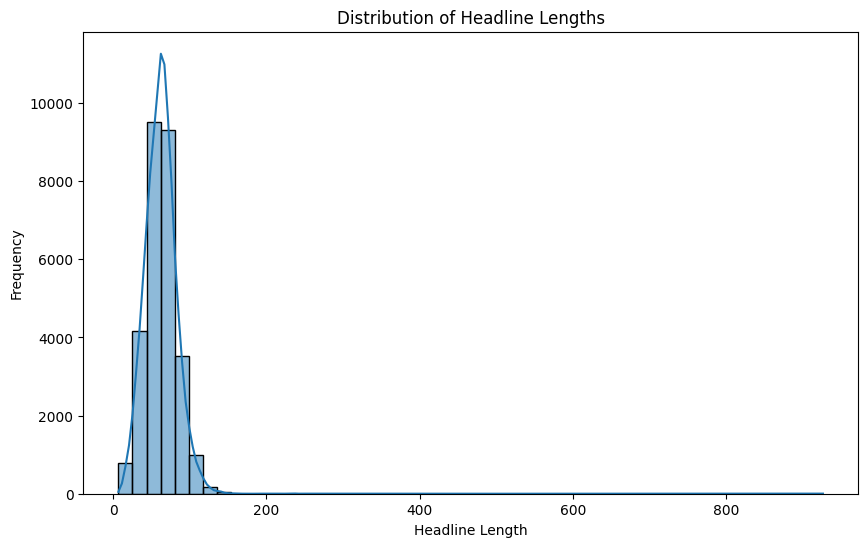

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-ebed3d14bf7f>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='headline_length', hue='is_sarcastic', shade=True)


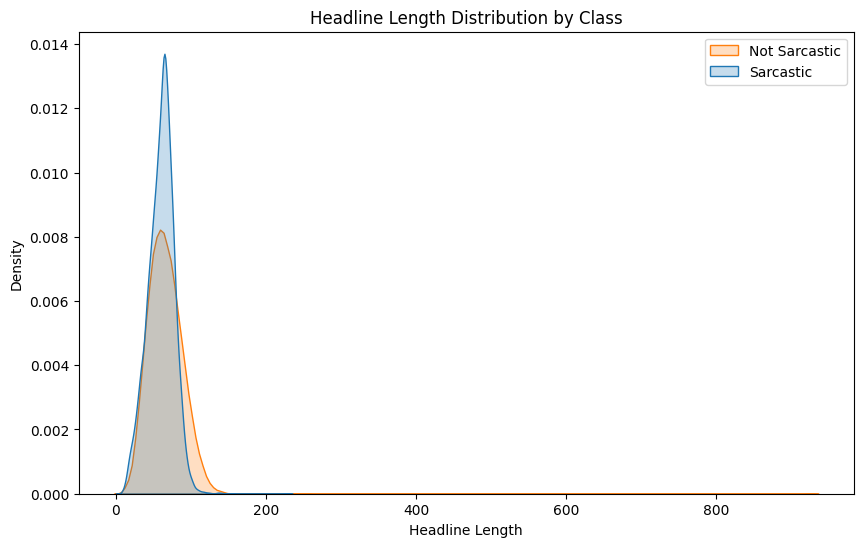

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='headline_length', hue='is_sarcastic', shade=True)
plt.title('Headline Length Distribution by Class')
plt.xlabel('Headline Length')
plt.ylabel('Density')
plt.legend(labels=['Not Sarcastic', 'Sarcastic'])
plt.show()

# Word Cloud Visualization

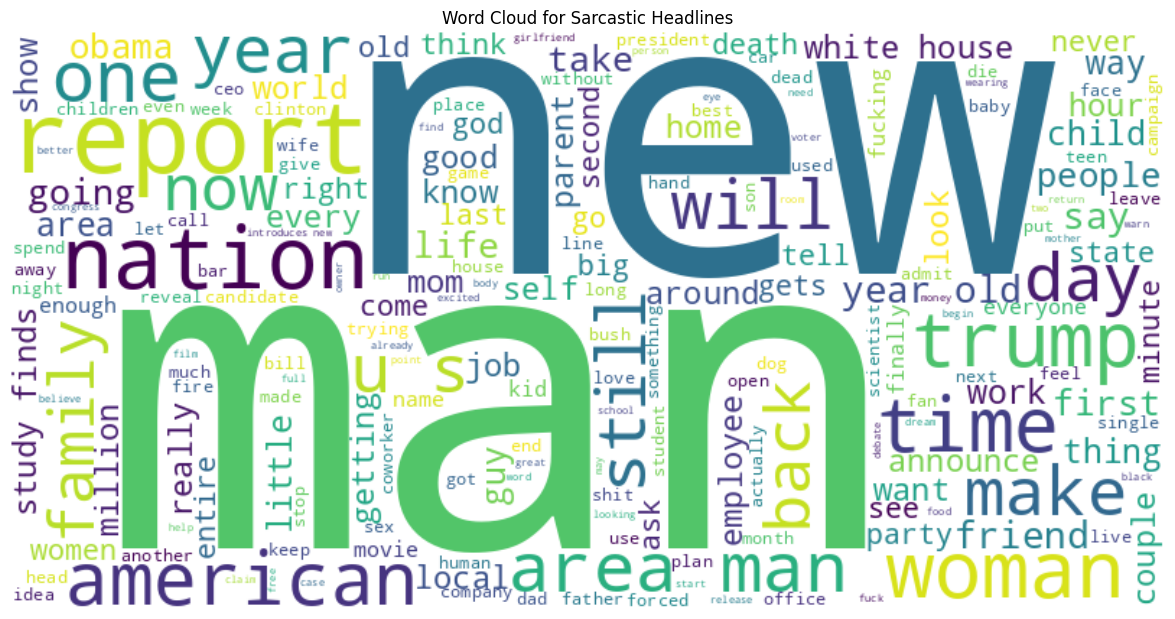

In [13]:
# Word Cloud for Sarcastic Headlines
sarcastic_text = " ".join(df[df['is_sarcastic'] == 1]['headline'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(sarcastic_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sarcastic Headlines')
plt.show()

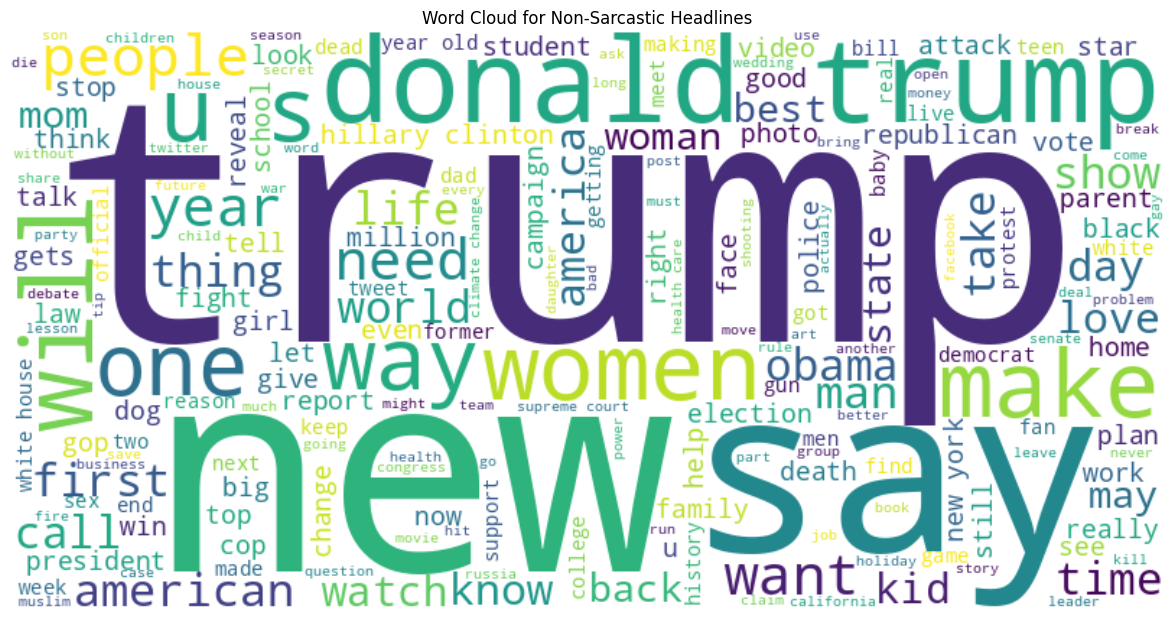

In [14]:
# Word Cloud for Non-Sarcastic Headlines
non_sarcastic_text = " ".join(df[df['is_sarcastic'] == 0]['headline'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(non_sarcastic_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Sarcastic Headlines')
plt.show()

# Most Frequent Words

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
def clean_tokenize(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

In [17]:
# Most Common Words in Sarcastic Headlines
sarcastic_words = df[df['is_sarcastic'] == 1]['headline'].apply(clean_tokenize).sum()
sarcastic_word_freq = Counter(sarcastic_words)

print("Most Common Words in Sarcastic Headlines:")
print(sarcastic_word_freq.most_common(20))

Most Common Words in Sarcastic Headlines:
[('man', 1274), ('new', 1000), ('report', 512), ('area', 484), ('woman', 385), ('trump', 384), ('nation', 376), ('year', 342), ('one', 318), ('time', 307), ('old', 298), ('day', 295), ('still', 251), ('u', 245), ('study', 242), ('like', 239), ('first', 230), ('back', 228), ('get', 228), ('family', 211)]


In [18]:
# Most Common Words in Non-Sarcastic Headlines
non_sarcastic_words = df[df['is_sarcastic'] == 0]['headline'].apply(clean_tokenize).sum()
non_sarcastic_word_freq = Counter(non_sarcastic_words)

print("Most Common Words in Non-Sarcastic Headlines:")
print(non_sarcastic_word_freq.most_common(20))

Most Common Words in Non-Sarcastic Headlines:
[('trump', 1446), ('new', 680), ('donald', 458), ('says', 349), ('women', 305), ('one', 268), ('u', 265), ('year', 244), ('first', 242), ('man', 241), ('people', 241), ('world', 241), ('obama', 235), ('day', 226), ('make', 217), ('gop', 215), ('like', 213), ('black', 208), ('get', 207), ('life', 203)]


# Data Cleaning for Modeling

In [19]:
def clean_text(text):
    # Remove HTML tags if any
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphabetic characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    return text

In [20]:
df['clean_headline'] = df['headline'].apply(clean_text)

In [21]:
df[['headline', 'clean_headline']].head()

,headline,clean_headline
0,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,dem rep. totally nails why congress is falling...,dem rep totally nails why congress is falling ...
2,eat your veggies: 9 deliciously different recipes,eat your veggies deliciously different recipes
3,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word 'strea...,mother comes pretty close to using word stream...


In [22]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['clean_headline'] = df['clean_headline'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
# Split Data into Features and Labels
X = df['clean_headline']
y = df['is_sarcastic']

In [24]:
# Save Cleaned Data
df.to_csv('/content/drive/MyDrive/Capstone/cleaned_sarcasm_dataset.csv', index=False)

# Feature Extraction

In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the vocabulary size
vocab_size = 5000  # Adjust as needed

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

# Fit the tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Determine the maximum sequence length
max_length = max(len(seq) for seq in X_train_seq)

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Model Building

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [30]:
from sklearn.svm import LinearSVC

# Initialize the SVM model
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

## Simple Neural Network (Multilayer Perceptron)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Define the embedding dimension
embedding_dim = 64

# Build the model
mlp_model = Sequential()
mlp_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
mlp_model.add(Flatten())
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
mlp_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the MLP model
history_mlp = mlp_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7010 - loss: 0.5575 - val_accuracy: 0.8632 - val_loss: 0.3304
Epoch 2/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8961 - loss: 0.2671 - val_accuracy: 0.8632 - val_loss: 0.3138
Epoch 3/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9317 - loss: 0.1908 - val_accuracy: 0.8667 - val_loss: 0.3234
Epoch 4/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9543 - loss: 0.1373 - val_accuracy: 0.8593 - val_loss: 0.3525
Epoch 5/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0965 - val_accuracy: 0.8518 - val_loss: 0.3874


## Recurrent Neural Network (LSTM)

In [32]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
lstm_model.add(Bidirectional(LSTM(64)))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the LSTM model
history_lstm = lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7273 - loss: 0.5204 - val_accuracy: 0.8514 - val_loss: 0.3320
Epoch 2/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8894 - loss: 0.2679 - val_accuracy: 0.8531 - val_loss: 0.3314
Epoch 3/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9198 - loss: 0.2063 - val_accuracy: 0.8518 - val_loss: 0.3449
Epoch 4/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9393 - loss: 0.1602 - val_accuracy: 0.8566 - val_loss: 0.3691
Epoch 5/5
642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9561 - loss: 0.1211 - val_accuracy: 0.8509 - val_loss: 0.4259


# Evaluation of all 3 Models

Logistic Regression Performance:
Accuracy: 0.8348
Precision: 0.8217
Recall: 0.8236
F1-score: 0.8227

Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.85      0.84      0.85      3048
    Sarcastic       0.82      0.82      0.82      2653

     accuracy                           0.83      5701
    macro avg       0.83      0.83      0.83      5701
 weighted avg       0.83      0.83      0.83      5701



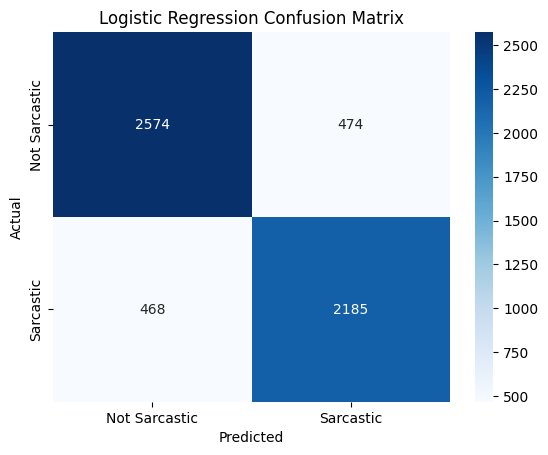

In [35]:
# Logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Not Sarcastic', 'Sarcastic']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

SVM Performance:
Accuracy: 0.8276
Precision: 0.8187
Recall: 0.8085
F1-score: 0.8136

Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.84      0.84      0.84      3048
    Sarcastic       0.82      0.81      0.81      2653

     accuracy                           0.83      5701
    macro avg       0.83      0.83      0.83      5701
 weighted avg       0.83      0.83      0.83      5701



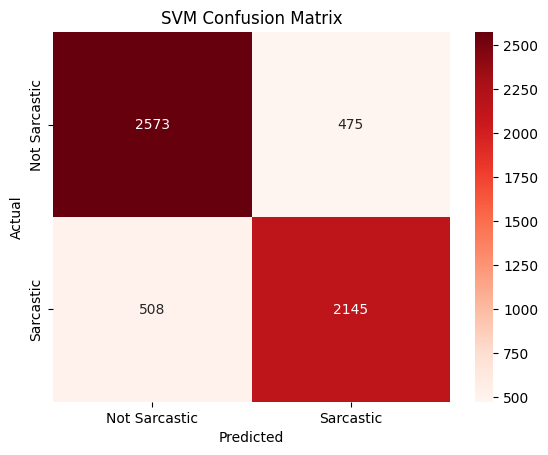

In [36]:
# SVM

# Predict on test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Performance:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Not Sarcastic', 'Sarcastic']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8491 - loss: 0.3946
MLP Test Accuracy: 0.8534
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report for MLP:
               precision    recall  f1-score   support

Not Sarcastic       0.86      0.86      0.86      3048
    Sarcastic       0.84      0.84      0.84      2653

     accuracy                           0.85      5701
    macro avg       0.85      0.85      0.85      5701
 weighted avg       0.85      0.85      0.85      5701



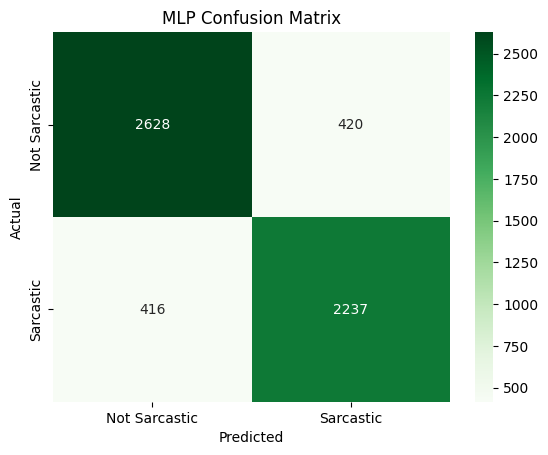

In [37]:
# Simple Neural Network (MLP)

# Evaluate the MLP model on test data
loss_mlp, accuracy_mlp = mlp_model.evaluate(X_test_padded, y_test)
print(f"MLP Test Accuracy: {accuracy_mlp:.4f}")

# Predict probabilities
y_pred_prob_mlp = mlp_model.predict(X_test_padded)
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype(int)

# Classification Report
print("\nClassification Report for MLP:")
print(classification_report(y_test, y_pred_mlp, target_names=['Not Sarcastic', 'Sarcastic']))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('MLP Confusion Matrix')
plt.show()


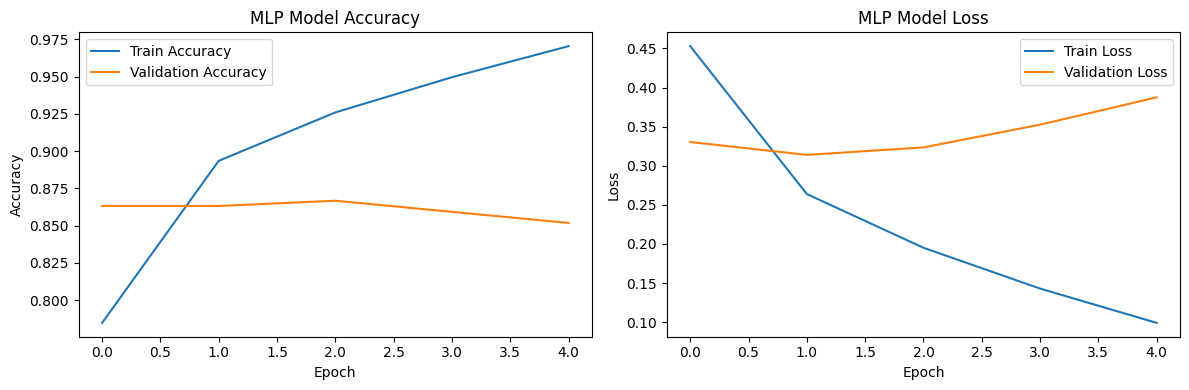

In [39]:
# Plot accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8441 - loss: 0.4268
LSTM Test Accuracy: 0.8491
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report for LSTM:
               precision    recall  f1-score   support

Not Sarcastic       0.85      0.87      0.86      3048
    Sarcastic       0.85      0.82      0.84      2653

     accuracy                           0.85      5701
    macro avg       0.85      0.85      0.85      5701
 weighted avg       0.85      0.85      0.85      5701



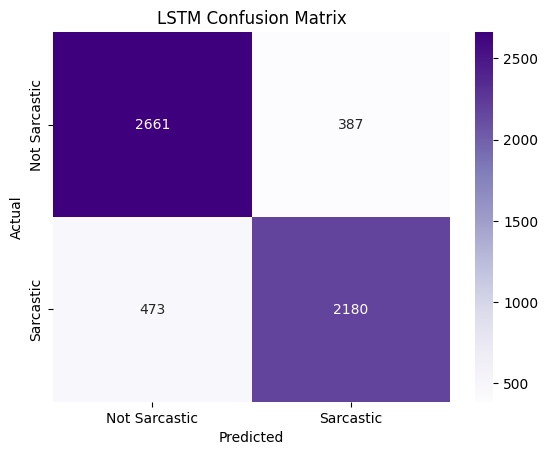

In [38]:
# LSTM Model

# Evaluate the LSTM model on test data
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

# Predict probabilities
y_pred_prob_lstm = lstm_model.predict(X_test_padded)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

# Classification Report
print("\nClassification Report for LSTM:")
print(classification_report(y_test, y_pred_lstm, target_names=['Not Sarcastic', 'Sarcastic']))

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('LSTM Confusion Matrix')
plt.show()

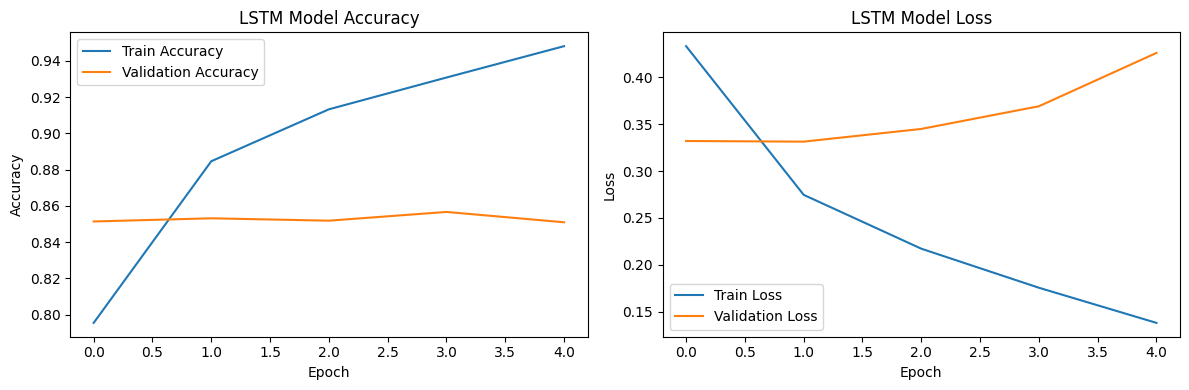

In [40]:
# Plot accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Analysis and Comparison

In [41]:
# After training and evaluating all models, compare their performance metrics to determine which model performs best on the sarcasm detection task.

# Create a summary table
import pandas as pd

performance_data = {
    'Model': ['Logistic Regression', 'SVM', 'MLP', 'LSTM'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_mlp, accuracy_lstm],
    'Precision': [precision_lr, precision_svm, precision_score(y_test, y_pred_mlp), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_lr, recall_svm, recall_score(y_test, y_pred_mlp), recall_score(y_test, y_pred_lstm)],
    'F1-score': [f1_lr, f1_svm, f1_score(y_test, y_pred_mlp), f1_score(y_test, y_pred_lstm)]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.834766   0.821737  0.823596  0.822666
1                  SVM  0.827574   0.818702  0.808519  0.813579
2                  MLP  0.853359   0.841927  0.843196  0.842561
3                 LSTM  0.849149   0.849240  0.821711  0.835249
